In [11]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"D:\SNU\Sem4\IOT-Temp.csv")

In [13]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [15]:
df=df.drop(["room_id/id"],axis=1)

In [16]:
df['noted_date']=pd.to_datetime(df['noted_date'])
df1=df.set_index('noted_date')
df1.head()

,id,temp,out/in
noted_date,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In


<AxesSubplot:xlabel='noted_date'>

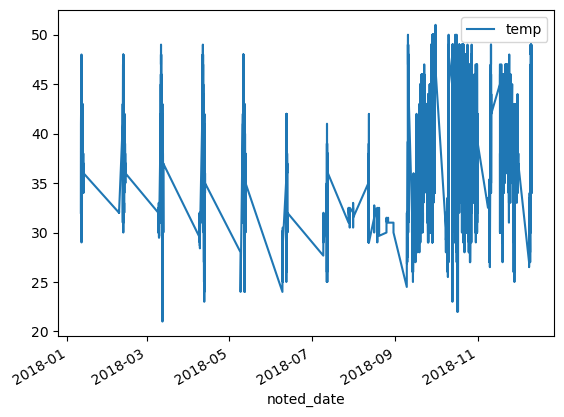

In [19]:
df11=df1.groupby(df1.index).mean()
df12=df1.groupby([df1.index,"out/in"]).mean()
df11.plot()

In [21]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfss=sc.fit_transform(df11)

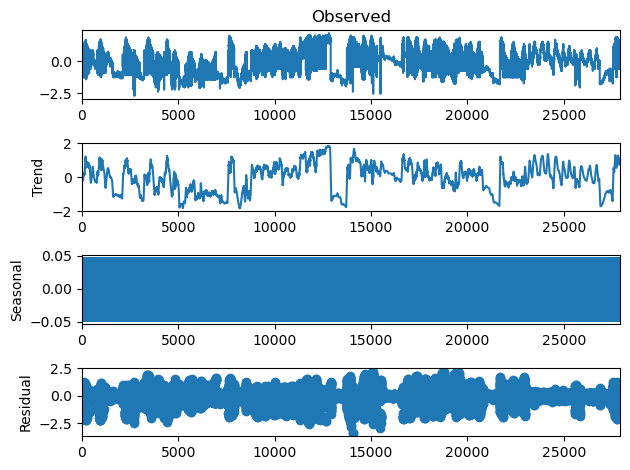

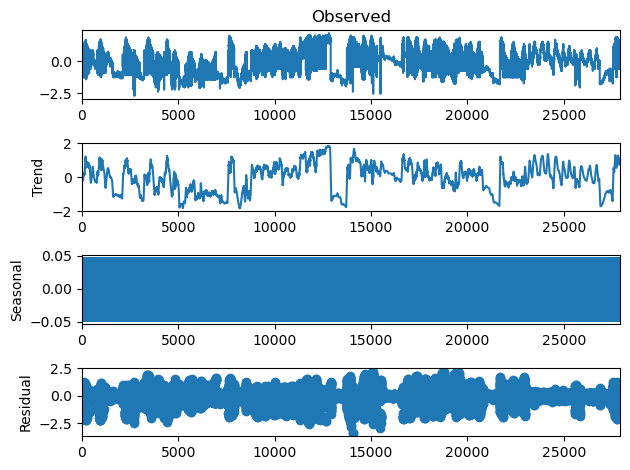

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfss, model='additive', period=52)
result.plot()

In [23]:
from statsmodels.tsa.arima.model import ARIMA
h=ARIMA(endog=dfss,order=(1,1,3))
model=h.fit()

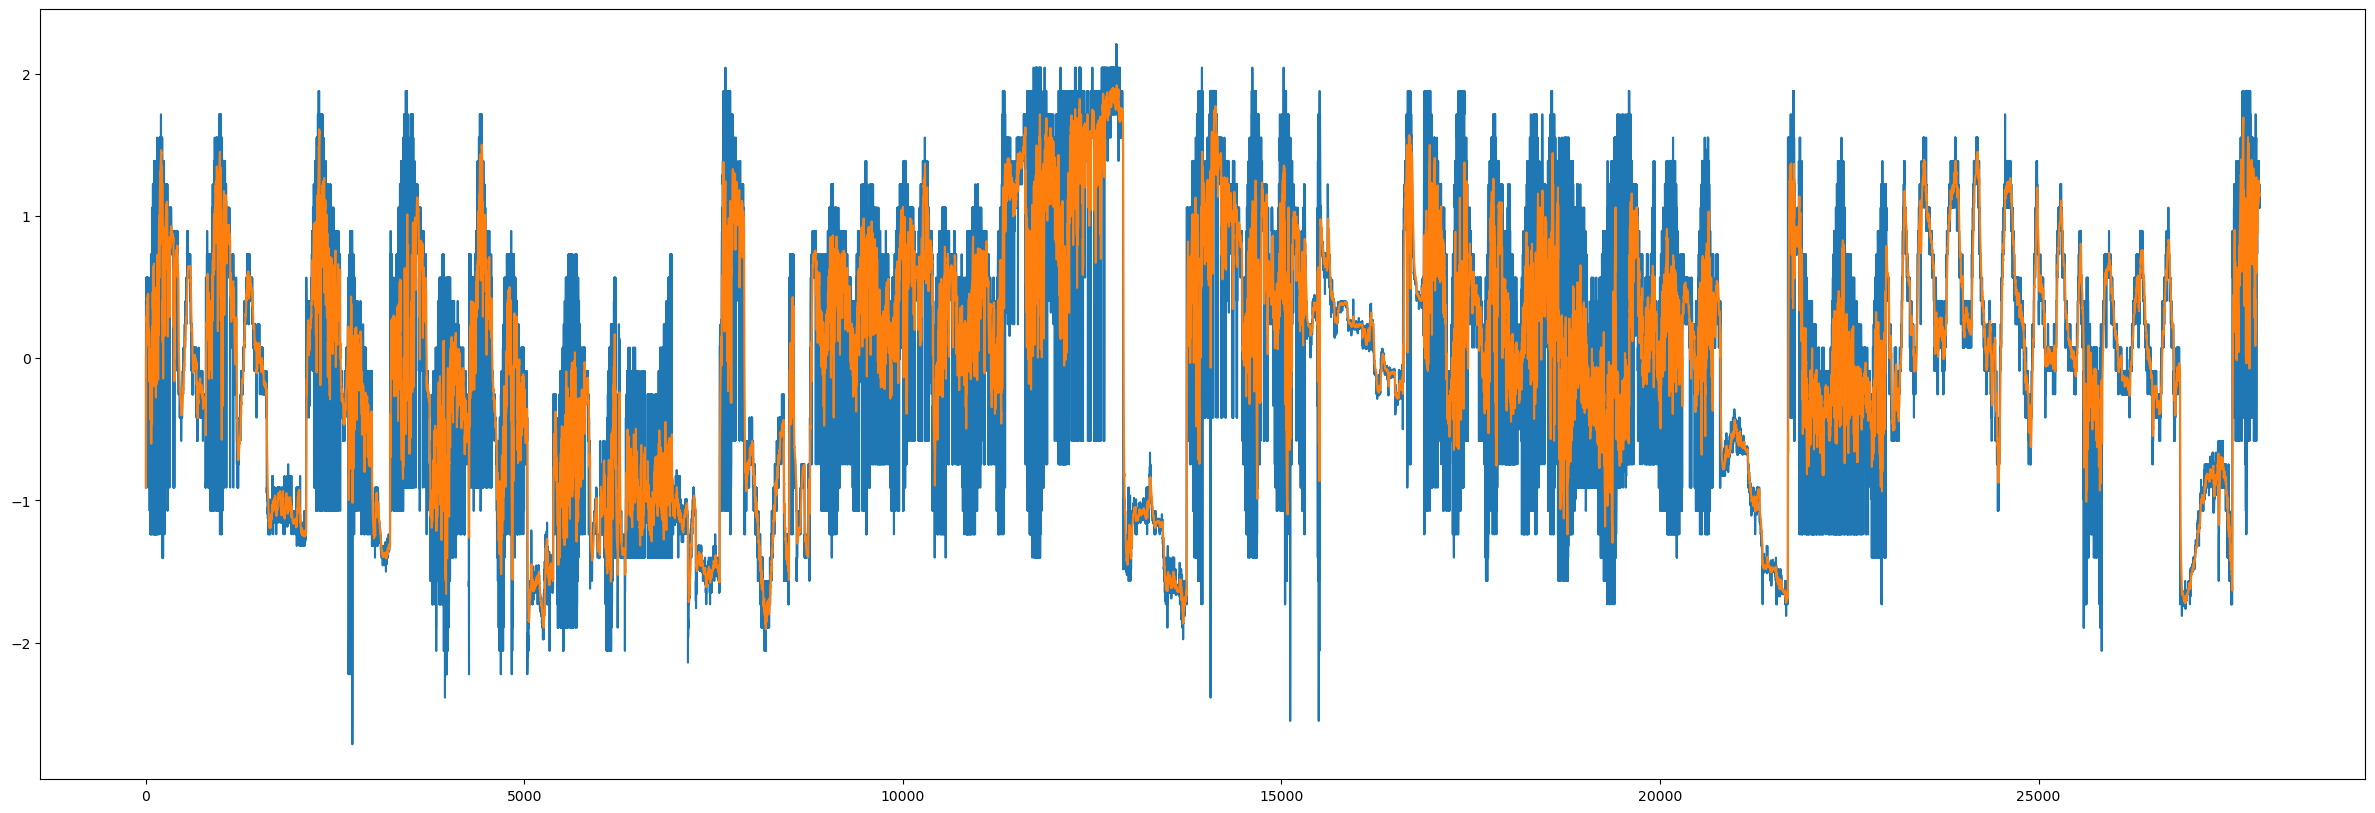

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dfss)
plt.plot(model.predict())
plt.show()